In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/dang/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


(540, 420)


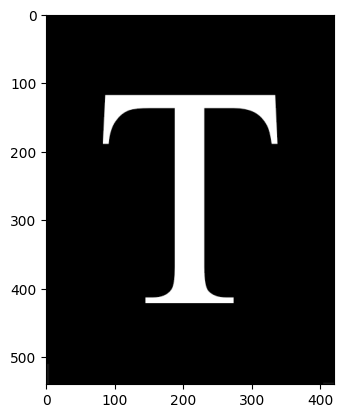

In [2]:
img = plt.imread("images/Fig0236(a)(letter_T).tif")
print(img.shape)
plt.imshow(img, cmap='gray')

# VI) Image Rotate

In [3]:
def image_rotate(img, theta):
    angle = np.radians(theta)
    height, width = img.shape
    
    new_height = (
        np.abs(height * np.cos(angle)) + np.abs(width * np.sin(angle))
    ).astype(np.int32)
    
    new_width = (
        np.abs(height * np.sin(angle)) + np.abs(width * np.cos(angle))
    ).astype(np.int32)

    output = np.zeros([new_height, new_width])
    cx = height // 2
    cy = width // 2
    center_x = new_height // 2
    center_y = new_width // 2
    
    for i in range(new_height):
        for j in range(new_width):
            x = (i - center_x) * np.cos(angle) - (j - center_y) * np.sin(angle)
            y = (i - center_x) * np.sin(angle) + (j - center_y) * np.cos(angle)
            x = round(x) + cx
            y = round(y) + cy
            if 0 <= x < height and 0 <= y < width:
                output[i, j] = img[x, y]
    
    return output

(-0.5, 539.5, 419.5, -0.5)

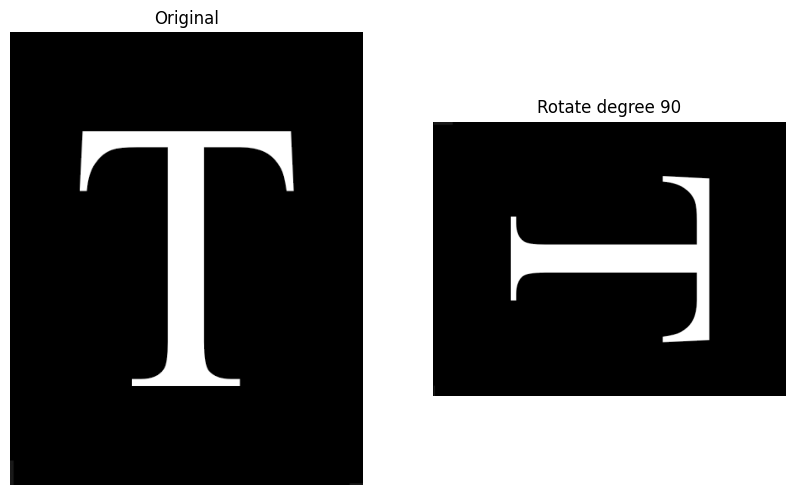

In [4]:
img_r90 = image_rotate(img, 90)

plt.figure(figsize=(10, 15))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_r90, cmap='gray')
plt.title("Rotate degree 90")
plt.axis("off")

# VII) Image Shear

In [5]:
def image_shear(img: np.array, sv: float, sh: float) -> np.array:
    """
    If you want run faster, use skimage
    Example:
        from skimage import transform as tf

        afine_tf = tf.AffineTransform(shear=(sv,sh))
        img_shear_tf = tf.warp(img, inverse_map=afine_tf)

    Args:
        img (np.array): image
        sv (float): _description_
        sh (float): _description_

    Returns:
        np.array: output
    """
    height, width = img.shape
    add_height = np.abs(height * sv).astype(np.int32)
    add_weight = np.abs(width * sh).astype(np.int32)
    new_height = height + add_height
    new_width = width + add_weight
    output = np.zeros([new_height, new_width])
    for i in range(new_height):
        for j in range(new_width):
            x = round(i - sv * j)
            y = round(j - sh * i)
            if 0 <= x < height and 0 <= y < width:
                output[i, j] = img[x, y]
    return output[
        add_height // 2 : height + add_height // 2,
        add_weight // 2 : width + add_weight // 2,
    ]

(-0.5, 419.5, 539.5, -0.5)

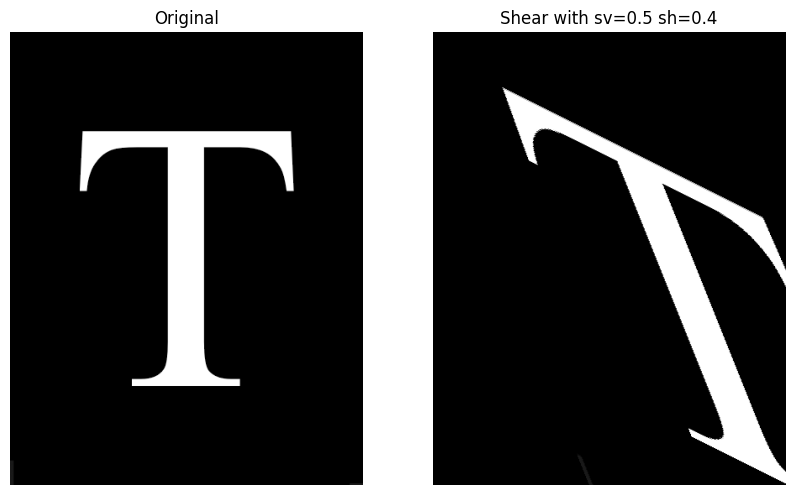

In [6]:
img_shear = image_shear(img, 0.5, 0.4)

plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_shear, cmap="gray")
plt.title("Shear with sv=0.5 sh=0.4")
plt.axis("off")

(-0.5, 419.5, 539.5, -0.5)

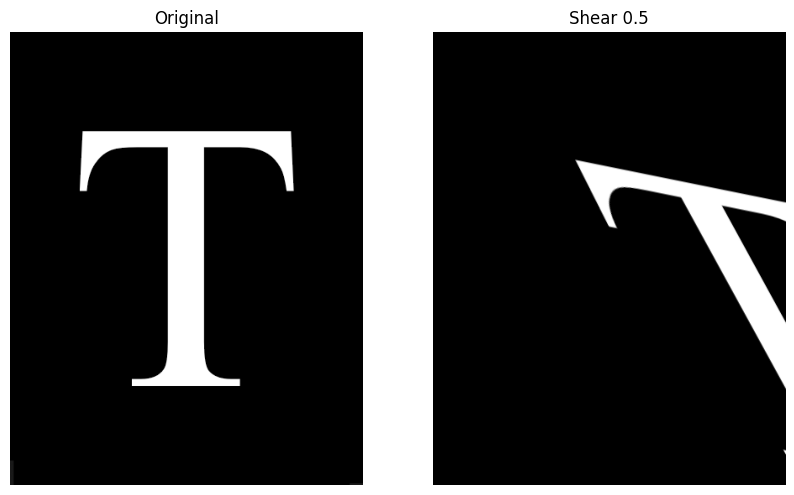

In [7]:
from skimage import transform as tf

afine_tf = tf.AffineTransform(shear=(0.5,0.2))
img_shear_lib = tf.warp(img, inverse_map=afine_tf)

plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_shear_lib, cmap="gray")
plt.title("Shear 0.5")
plt.axis("off")

# VIII) PDF and CDF

(540, 420) (684, 1024, 3)


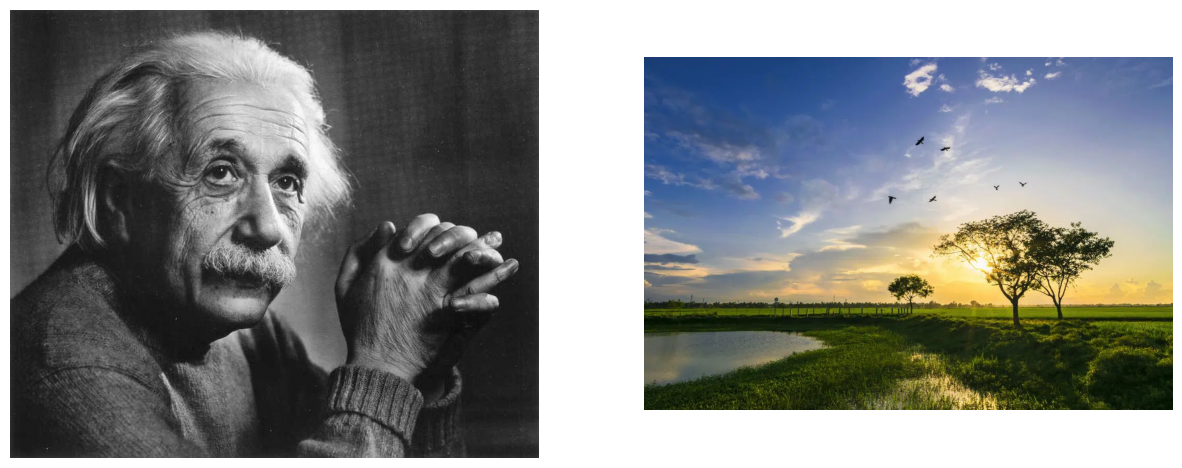

In [8]:
img2 = plt.imread("images/Fig0241(c)(einstein high contrast).tif")
img2_rgb = plt.imread("images/natural.jpg")

plt.figure(figsize=(15, 20))

plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img2_rgb)
plt.axis("off")

print(img.shape, img2_rgb.shape)

<Axes: ylabel='Density'>

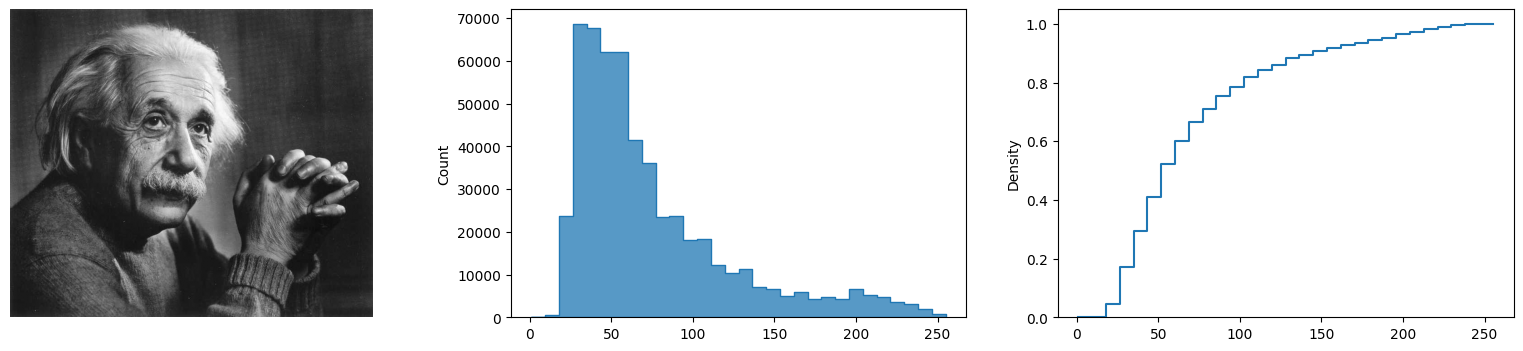

In [21]:
import seaborn as sns

plt.figure(figsize=(20, 4))


plt.subplot(1, 3, 1)
plt.imshow(img2, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
sns.histplot(img2.ravel(), bins=30, element="step", stat="count")

plt.subplot(1,3,3)
sns.histplot(img2.ravel(), bins=30, element="step", fill=False, stat="density", cumulative=True)

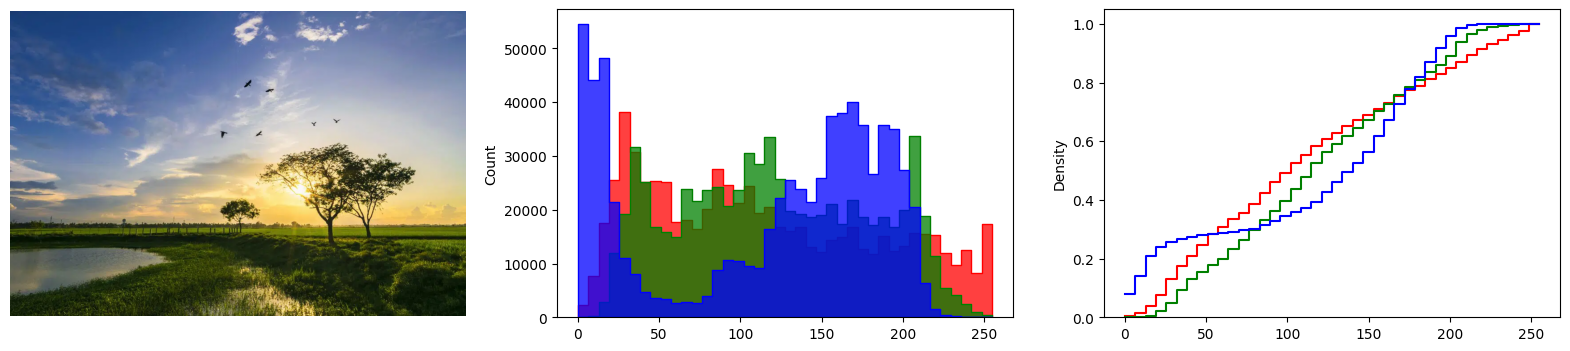

In [24]:
colors = ["red", "green", "blue"]

plt.figure(figsize=(20, 4))


plt.subplot(1, 3, 1)
plt.imshow(img2_rgb, cmap="gray")
plt.axis("off")

for i in range(3):
    plt.subplot(1, 3, 2)
    sns.histplot(img2_rgb[:,:,i].ravel(), bins=40, element="step", stat="count", color=colors[i])

    plt.subplot(1,3,3)
    sns.histplot(img2_rgb[:,:,i].ravel(), bins=40, element="step", fill=False, stat="density", cumulative=True, color=colors[i])